## PHYS-467 Machine Learning for Physicists. Exercise session 4

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import pickle, os
from urllib.request import urlopen 

from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge, Lasso, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

np.random.seed(42)

# Exercise 1 : (Stochastic) Gradient Descent with Logistic regression

**Question 1.a)** Implement the sigmoid function $\sigma(x)$

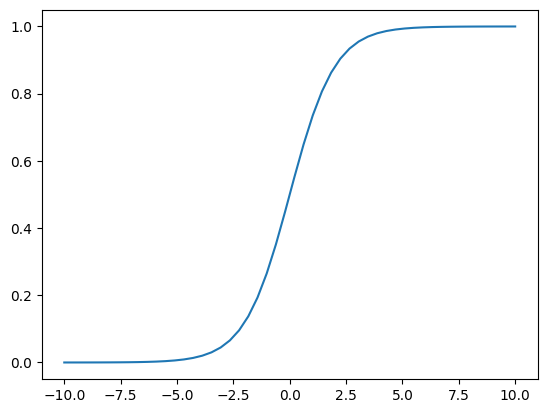

In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

**Question 1.b)** Generate an $n\times{d}$ random data matrix with dimension $d = 2$. Generate a random vector of optimal parameters $w_{opt}$. Generate the labels as $y = \pm 1$ from the distribution $p(y = 1 | x) = 1 - p(y = -1 | x) = \sigma(w_{opt}^Tx)$. 

In [1008]:
d = 2
n = 20
a = 5
M = np.random.randn(n*d).reshape(n,d)
w_opt = np.random.randn(n)
z = w_opt.T@M
print(sigmoid(z))
y = np.array([np.random.choice([-1,1], p = [sigmoid(z), 1-sigmoid(z)]) for z in w_opt.T@M]).flatten()
print(y)

[0.7684338  0.96959932]
[-1 -1]


**Question 1.c)** Verify that sigmoid(x) = 1-sigmoid(x)

In [985]:
print("sigmoid(x) = 1-sigmoid(x) = ",round(np.linalg.norm(sigmoid(x)-(1-sigmoid(-x)),axis=0), 10))

sigmoid(x) = 1-sigmoid(x) =  0.0


**Question 1.d)** Implement a function performing one step gradient descent for logistic regression. Recall that with $y = \pm 1$,  the logistic loss is $\mathcal L = - \sum_i \log \sigma(y_i \times w^T x_i)$. Implement a second function enabling multiple iterations of gradient descent. This function should return the parameters calculated at each iteration.

In [1009]:
def grad(X, y, w, lr):
    #return w_i^t+1 = w_i^t - dL/dw | w_t
    z = y * (w.T @ X)
    return w - (lr*np.sum((1-sigmoid(z))) * X @ y )

**Question 1.e)** Implement stochastic gradient descent using the gradient step function used in the previous question. Hint: you should apply the gradient step function only on a random subset of the data at each iteration.

In [1067]:
def stochastic_grad(X, y, w, lr, t):
    w_t = [0]
    X_batch = X[np.random.choice(X.shape[0], t, replace=False)]
    w_t[0] = grad(X_batch, y, w, lr)
    for i in range(t-1):
        X_batch = X[np.random.choice(X.shape[0], t, replace=False)]
        w_t.append(grad(X_batch, y, w, lr))
    return w_t

**Question 1.f)** Run GD and SGD with a small learning rate $\eta$ ($10^{-2}$ should work fine). Plot $\ cos (\frac{w_t \cdot w_{\star}}{\vert{w_t}\vert\vert{w_{\star}\vert}})$ as a function of the number of iterations $t$ for Gradient Descent and Stochastic Gradient Descent. 

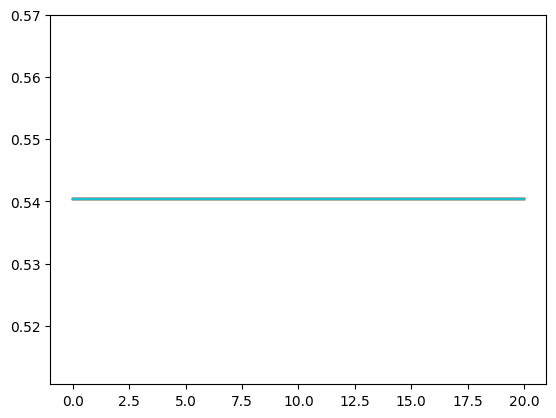

In [1068]:
eta = 10**(-2)
t = 20
w_t = grad(M, y, w_opt, eta)
w_star = stochastic_grad(M, y, w_opt, eta, t)
iterations = np.linspace(0,t, w_t.shape[0])
cosine = lambda w_t, w_star: np.cos((w_t*w_star) / (np.abs(w_t)*np.abs(w_star)))

plt.plot(iterations, cosine(w_t,w_star))


**Question 1.g)** Use sklearn's LogisticRegression with fit_intercept=False and compare its accuracy with that obtained by gd and the optimal parameters.

**Question 1.h)** In this question we look at the role of the learning rate in the convergence of gradient descent. Run GD with a large learning rate (say $\eta$ = 10.0), and observe that GD does not converge.

# Exercise 2: LASSO

**Question 2.a)** Generate a $n\times{d}$ matrix with entries drawn from a Gaussian with zero mean and unit variance. Choose $n=300$ and $d=10$.

**Question 2.b)** Given the vector $w_{opt}$ provided below, print it and use it to generate the training and testing labels. Corrupt the labels with zero-mean unit-variance Gaussian noise

In [2]:
d=10
w_opt = np.random.choice([0,1,-1], d ,p=[0.7,0.15,0.15])


**Question 2.c)** Perform linear regression on the training data and print: a) the so-found coefficients and the train error

**Question 2.d)** Fit sklearn's LASSO on the training data and print: a) the so-found coefficients and the train error. Fix the regularization to 0.1. Look at the coefficients, what do you notice?

**Question 2.e)** Use cross validation to find the optimal value of the regularization strength in Lasso. Plot the different coefficients as a function of $\lambda$ 

# Exercise 3: Ridge Classification, Logistic Regression

In this exercise we first consider a synthetic dataset to compare Ridge and Logistic regression for classification

**Question 3.a)** Use the sklearn function make_classification to generate 1000 data samples in 2 dimension. Use the following arguments: n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=12. Then use train_test_split with the following arguments X, y, test_size=0.2, random_state=42, to generate training and test splits.

**Question 3.b)** Make a scatter plot of the training data. Color each point according to its cluster assignment. _Hint_ : To change the color as a function of the label, use the option `c=y` in `plt.scatter`.

**Question 3.c)** Train a ridge classifier and a logistic regression using sklearn. Compare the results in terms of accuracy.

**Question 3.d)** Plot the decision boundaries of the two models 

In [3]:
def plot_decision_boundaries(X_test,y_test,ridge_classifier, logistic_regression, accuracy_ridge,accuracy_logistic):
    """
    arguments : 
        - X_test, y_test : test data
        - ridge_classifier : instance of the class RidgeClassifier
        - logistic_regression : instance of the class LogisticRegression
        - accuracy_ridge : accuracy of the ridge classifier
        - accuracy_logistic : accuracy of the logistic regression
    """
    # Plot the decision boundary for Ridge Classifier
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm')
    plt.title(f"Ridge Classifier\nAccuracy: {accuracy_ridge:.2f}")
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = ridge_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    
    # Plot the decision boundary for Logistic Regression
    plt.subplot(1, 2, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm')
    plt.title(f"Logistic Regression\nAccuracy: {accuracy_logistic:.2f}")
    ax = plt.gca()
    Z = logistic_regression.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    
    plt.show()

**Question 3.e)** Implement ridge classification from scratch. Implement two functions: one should return the weights and biases, the other should return the classification results given the inputs and the previously obtained coefficients. Add the option to include a regularization parameter.

**Question 3.f)** Plot the decision boundary and compare it with that obtained via sklearn. Use alpha = 1.

# Exercise 4: Classification on the Ising model 

We will now apply regression to the Ising model to predict the phase of the system. 

In [4]:
# Ising model parameters

L=40 # linear system size
J=-1.0 # Ising interaction
#T=np.linspace(0.25,4.0,16) # set of temperatures
T_c=2.26 # Onsager critical temperature in the TD limit

**Question 4.a)**

1) Load the data using the provided function `load_data`, then split the data in three categories : the first **70000** samples are configurations in the **ordered** phase, the next **30000** samples are in the **critical** phase and the last **60000** samples are in the **disordered** phase.

2) Merge the ordered and disordered samples together, use half of them for a training set and the rest for a validation set.

In [5]:
def load_data():
    """
    Loads the data of the Ising model. The labels correspond to ordered (1) and disordered states (0).
    """
    # url to data
    url_main = 'https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/';
    ######### LOAD DATA
    # The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
    data_file_name = "Ising2DFM_reSample_L40_T=All.pkl" 
    # The labels are obtained from the following file:
    label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"
    #DATA
    data = pickle.load(urlopen(url_main + data_file_name)) # pickle reads the file and returns the Python object (1D array, compressed bits)
    data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
    data=data.astype('int')
    data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

    #LABELS (convention is 1 for ordered states and 0 for disordered states)
    labels = pickle.load(urlopen(url_main + label_file_name)) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)
    return data, labels


**Question 4.b)** Plot one instance of each class

In [6]:
# set colourbar map
#cmap_args=dict(cmap='plasma_r')

# plot states
#fig, axarr = plt.subplots(nrows=1, ncols=3)

#axarr[0].imshow(X_ordered[20001].reshape(L,L),**cmap_args)
#axarr[0].set_title('$\\mathrm{ordered\\ phase}$',fontsize=16)
#axarr[0].tick_params(labelsize=16)

#axarr[1].imshow(X_critical[1000].reshape(L,L),**cmap_args)
#axarr[1].set_title('$\\mathrm{critical\\ region}$',fontsize=16)
#axarr[1].tick_params(labelsize=16)

#im=axarr[2].imshow(X_disordered[50000].reshape(L,L),**cmap_args)
#axarr[2].set_title('$\\mathrm{disordered\\ phase}$',fontsize=16)
#axarr[2].tick_params(labelsize=16)

#fig.subplots_adjust(right=2.0)

#plt.show()

**Question 4.c)** Train a Ridge and Logistic regression model using different regularization and evaluate the performance on the validation set and the samples in the critical phase. What do you notice ?
_Note_ : Training the models might take some time 

# Exercise Extra : Linear Regression (clarifications)

In this first exercise, we'll clarify the link between Gradient Descent, the pseudo-inverse and regularization for Ridge regression

**Question E.a)** Generate a random $n\times{d}$ data matrix $X$ where $n=5$ and $d=10$. Generate an $n-$ dimensional _random_ label vector $y$.

**Question E.b)** Use sklearn's LinearRegression to solve the OLS problem on the previously generated data. Use the option fit_intercept=False.

**Question E.c)** Recall that the OLS solution is given by $w = (X^TX)^{-1}X^Ty$. Note that when $n<d$, the matrix $X^TX$ is not invertible and we should resort to the pseudoinverse of $X$. In this case the solution reads $w = X^T(XX^T)^{-1}y$. Write a function that returns the solution calculated in this way and compare the so-obtained coefficients with those obtained by sklearn. What can you conclude?

**Question E.c)** Another way to make the matrix invertible is to do Ridge Regression. Implement a function returning the regularized solution and compare with the solution obtained by sklearn's Ridge, use $\lambda=1$ for both cases.

**Question E.d)** Use a small regularization parameter, say $\lambda = 0.001$ and compare the output of Ridge regression with the pseudo-inverse. What do you notice ?

**Question E.e)** Compute the square error on the training data, obtained by using the pseudoinverse coefficient and the error obtained with the regularised coefficient (with $\lambda = 0.1$). Which one do you expect to be smaller?

**Question E.f)** Consider the OLS problem and implement a function performing one step of gradient descent w.r.t. the parameters. Implement a second function calling the first function for M iterations and finally returning the optimal parameters.

**Question E.g)** Compute 1) $w_a$ the parameters obtained by initializing gradient descent with a vector of zeroes, and $w_b$ the parameters obtained by initializing gradient descent with a vector of ones. Compare both $w_a$ and $w_b$ with the solution obtained by the pseudo-inverse. What do you notice ?

**Question E.h)** Generate a random data $n\times{d}$ matrix $X$ where $n=10$ and $d=5$. Generate an $n-$dimensional label vector $y$.

**Question E.i)** Use sklearn's LinearRegression to solve the OLS problem on the previously generated data. Use the option fit_intercept=False.

**Question E.l)** Write a function returning the standard OLS solution and compare it with the sklearn's solution

**Question E.m)** Compute the training error obtained by using the OLS coefficient and the error obtained with the regularised coefficient (with $\lambda = 0.1$). Which one do you expect to be smaller?

**Question E.n)** Use the GD function implemented before and compare the solution it finds with the one found by sklearn's LinearRegression.